In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
sales = pd.read_csv('shopping_trends_updated.csv')
sales.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [43]:
#Previewing the bottom of the dataset
sales.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [44]:
sales.shape

(3900, 18)

In [45]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [46]:
# Checking for missing values
sales.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [47]:
# Checking for duplicates
sales.duplicated().sum()

0

In [48]:
# Summary of the data 
sales.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [49]:
sales.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [50]:
sales.groupby('Payment Method')['Payment Method'].count().sort_values(ascending=False).head()

Payment Method
PayPal         677
Credit Card    671
Cash           670
Debit Card     636
Venmo          634
Name: Payment Method, dtype: int64

[Text(0.5, 1.0, 'Payment Method')]

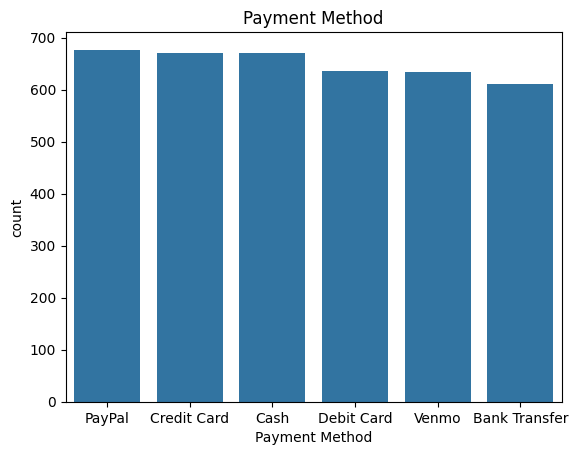

In [51]:
base_color = sns.color_palette()[0]

method = sales['Payment Method'].value_counts().index

sns.countplot(data=sales, x='Payment Method', color=base_color, order=method).set(title="Payment Method")

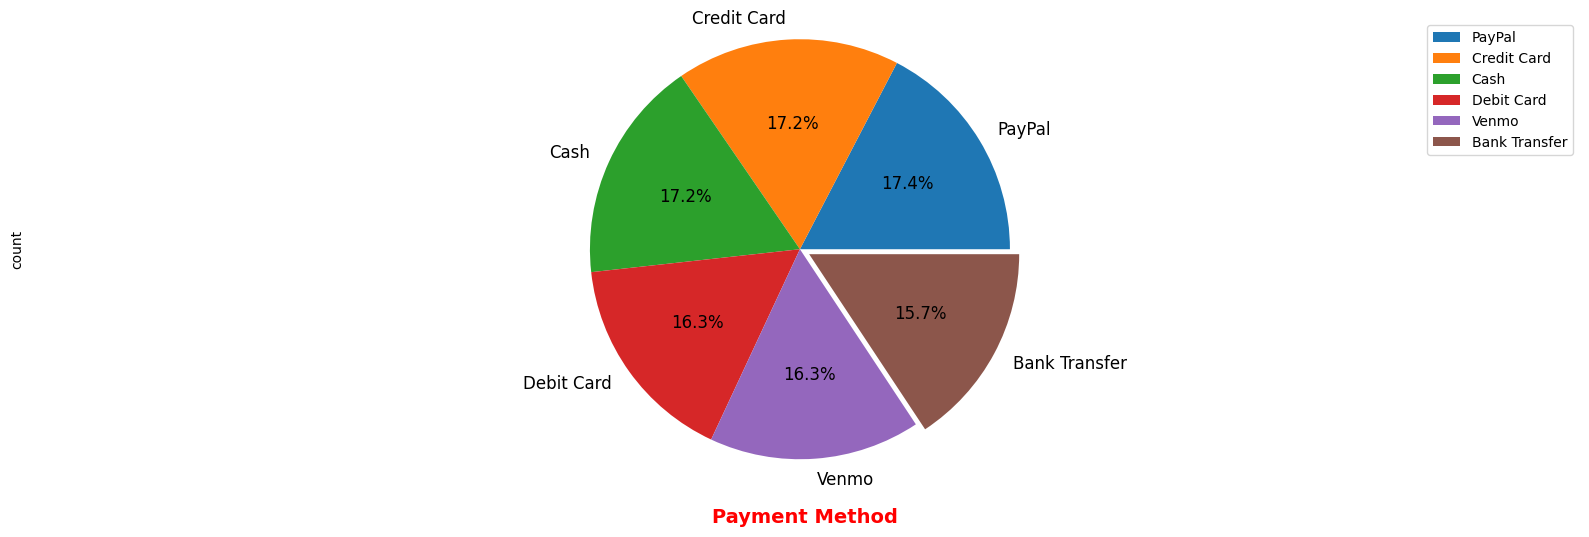

In [54]:
plt.figure(figsize=(20,6))

counts = sales['Payment Method'].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.05)

counts.plot(kind='pie',fontsize=12,explode=explode,autopct = '%1.1f%%')
plt.xlabel('Payment Method', fontdict={'fontsize': 14, 'color': 'red', 'weight': 'bold'}, labelpad=20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")

plt.show()

In [ ]:
sales.Gender.unique()

array(['Male', 'Female'], dtype=object)

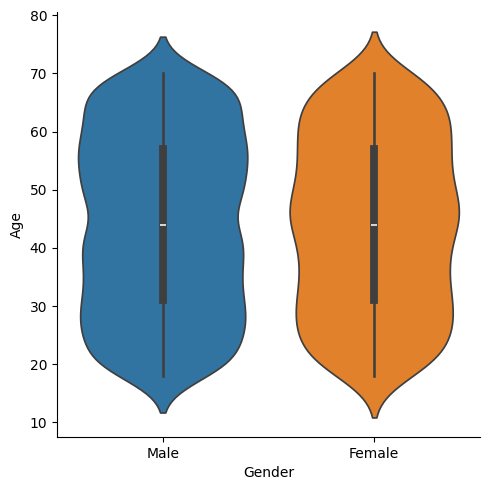

In [ ]:
sns.catplot(
    data=sales,x='Gender',y='Age',hue="Gender",
    kind="violin",split=False,
)


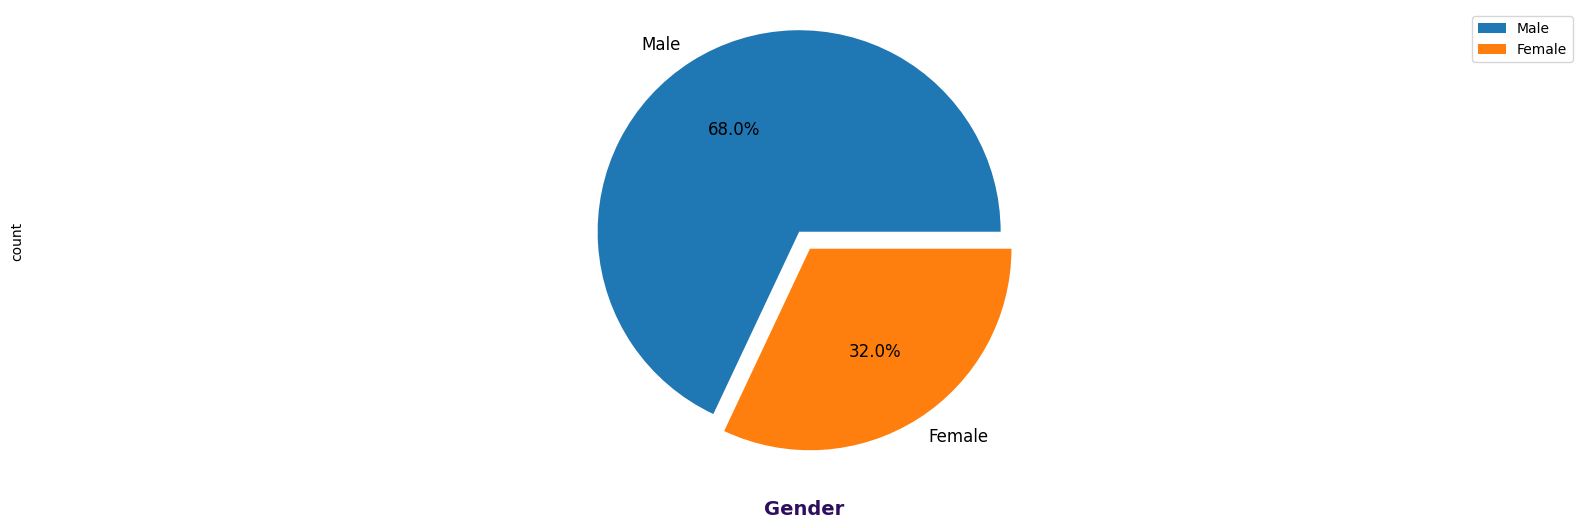

In [ ]:
plt.figure(figsize=(20,6))

counts = sales['Gender'].value_counts()
explode = (0, 0.1)

counts.plot(kind="pie",fontsize=12,explode=explode,autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

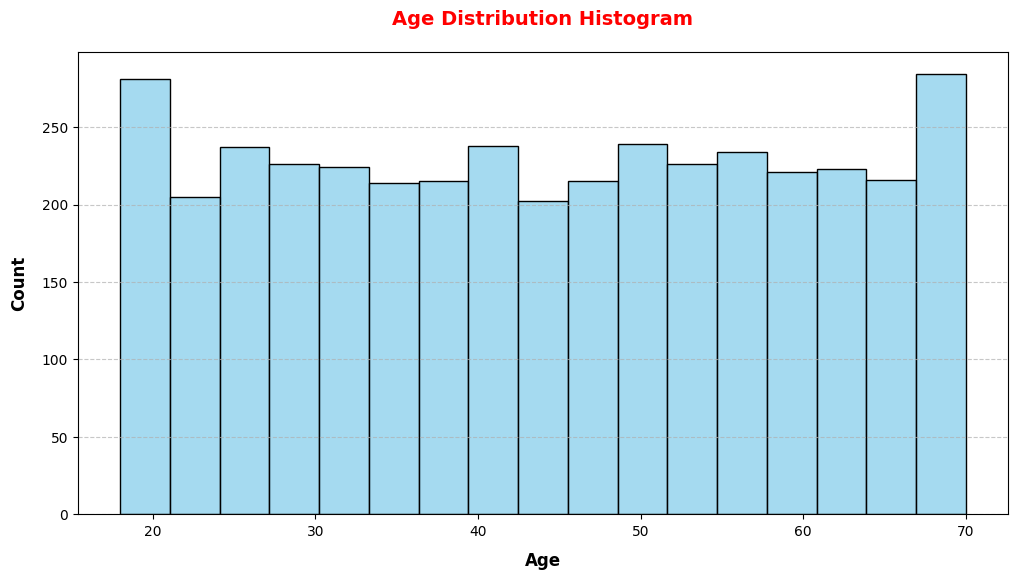

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=sales,x='Age',binwidth=3,color='skyblue',edgecolor='black')

plt.xlabel('Age', fontsize=12, fontweight='bold', color='black', labelpad=10)  # X eksen etiketi
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black', labelpad=10)  # Y eksen etiketi
plt.title('Age Distribution Histogram', fontsize=14, fontweight='bold', color='red', pad=20)  # Başlık

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
sales["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

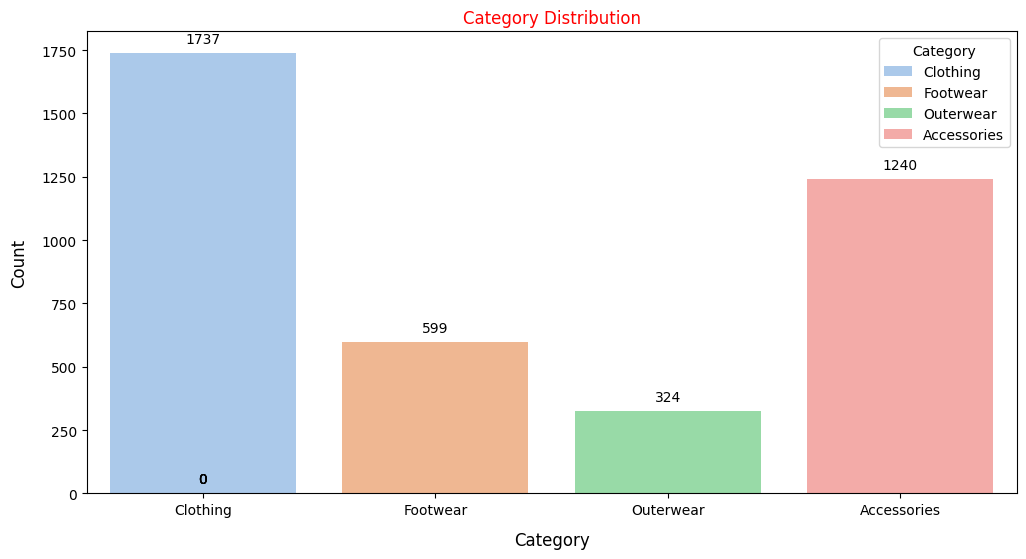

In [ ]:
plt.figure(figsize=(12,6))  

ax = sns.countplot(data=sales, x='Category',hue='Category',palette='pastel',legend=True)

plt.xlabel('Category', fontsize=12,color='black', labelpad=10)  
plt.ylabel('Count', fontsize=12, color='black', labelpad=10)  
plt.title('Category Distribution',color = 'red')  

plt.xticks(rotation=0)  

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')


plt.show()

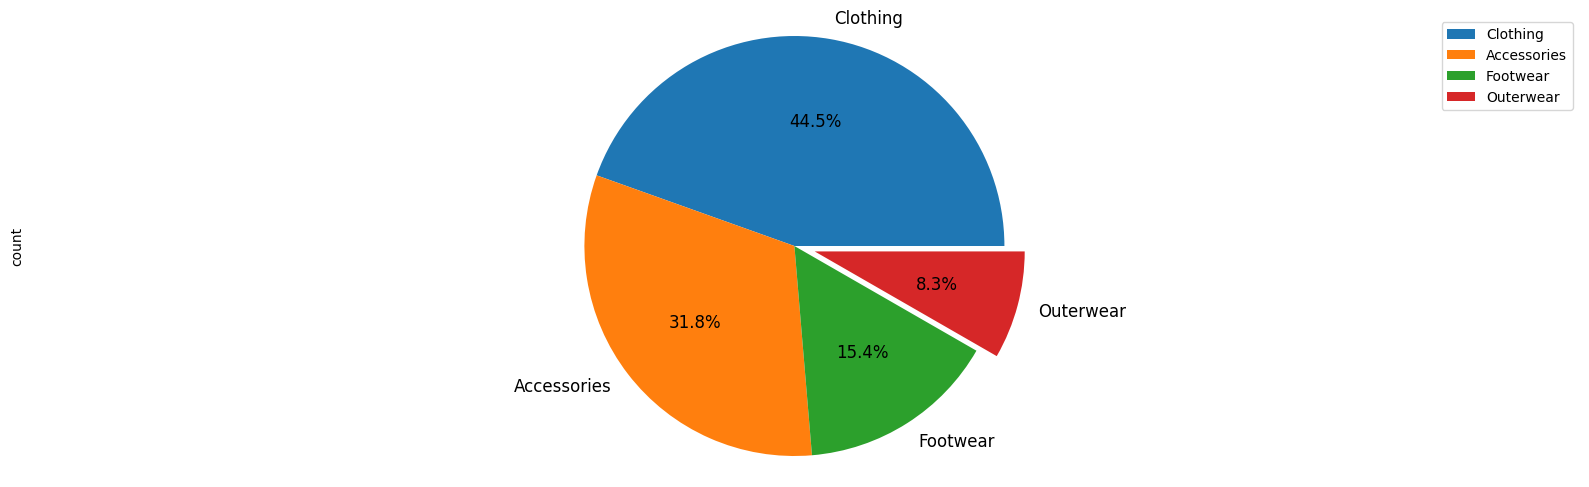

In [ ]:
plt.figure(figsize=(20,6))

counts = sales["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind='pie',fontsize=12,explode=explode,autopct = '%1.1f%%')

plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [ ]:
sales["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alaska            72
Massachusetts     72
Utah              71
Wyoming           71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

<Figure size 2000x600 with 0 Axes>

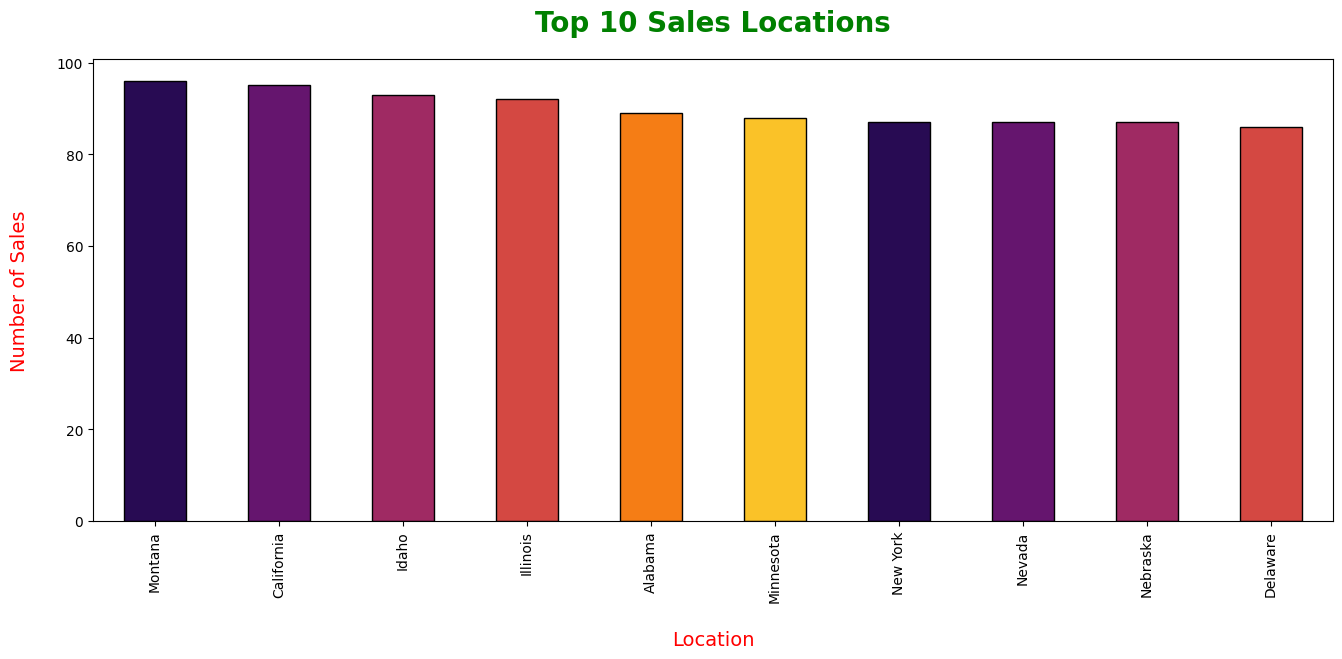

In [ ]:
plt.figure(figsize=(20,6))
plt.figure(figsize = (16, 6))
sales["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')

plt.xlabel('Location',fontsize=14,color='red',labelpad=20)
plt.ylabel('Number of Sales', fontsize=14, color='red', labelpad=20)
plt.title('Top 10 Sales Locations', fontweight='bold',fontsize=20, color='green', pad=20)

plt.show()

In [ ]:
sales['Size'].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

/tmp/ipykernel_44977/2142051028.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('Medium','Large','Small','Extra Large'))


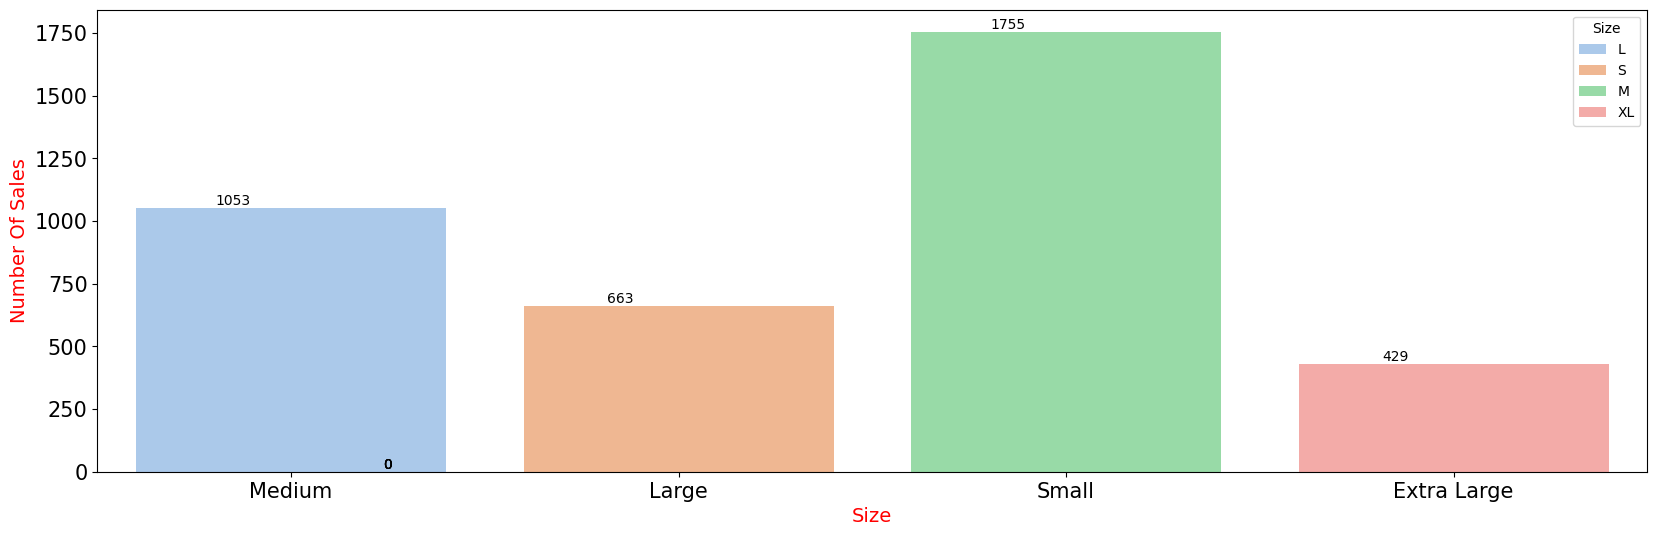

In [ ]:
plt.figure(figsize=(20,6))

ax = sns.countplot(data=sales,x='Size',hue='Size',palette='pastel',legend=True)

ax.set_xticklabels(('Medium','Large','Small','Extra Large'))

plt.xlabel('Size',fontsize=14,color='red')
plt.ylabel('Number Of Sales',fontsize=14,color='red')

plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.show()

In [ ]:
sales.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [ ]:
sales["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

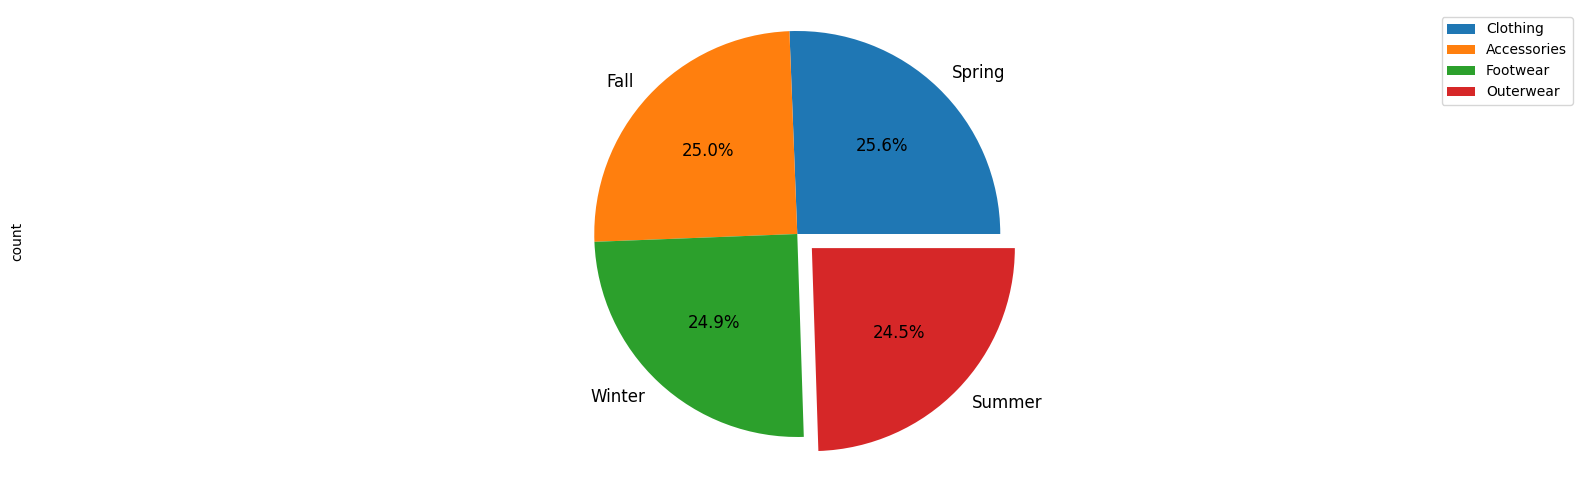

In [ ]:
plt.figure(figsize=(20,6))
ax = sales["Season"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

ax.plot(kind='pie',fontsize=12,explode=explode,autopct = '%1.1f%%')

plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()


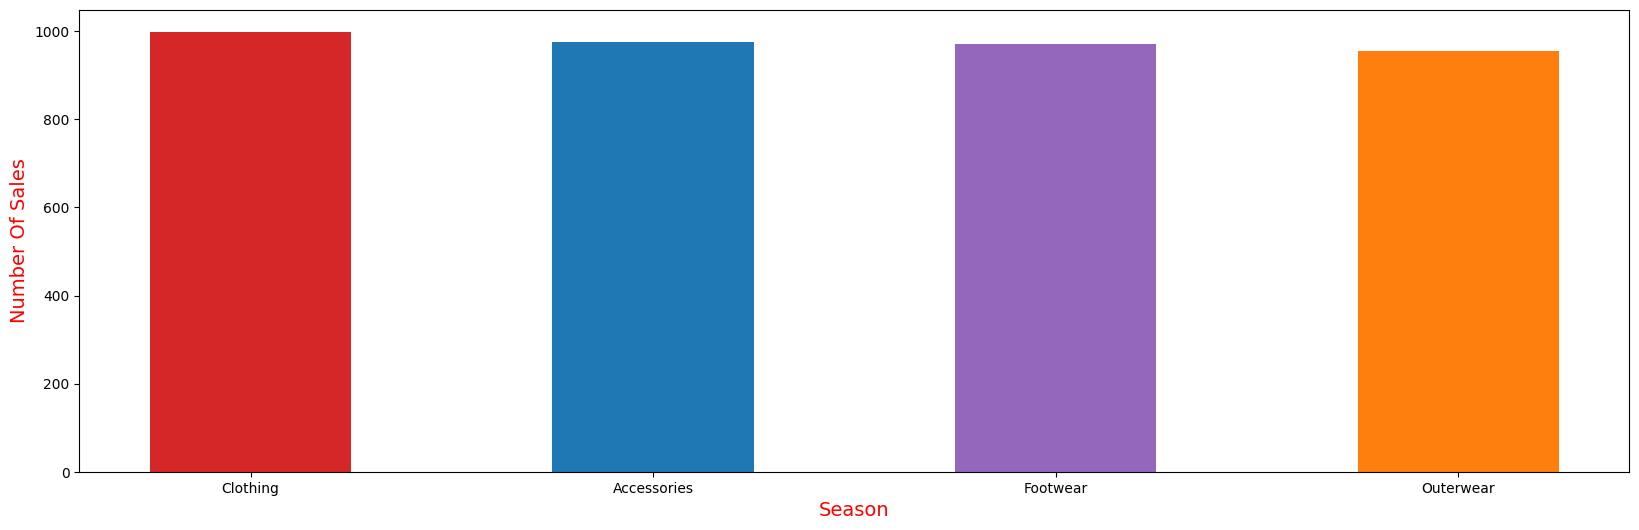

In [ ]:
plt.figure(figsize=(20, 6))
ax = sales["Season"].value_counts()

bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange']
bar_labels = counts.index

plt.bar(bar_labels, height=ax, color=bar_colors, label=bar_labels,width=0.5)

plt.xlabel('Season', fontsize=14, color='red')
plt.ylabel('Number Of Sales', fontsize=14, color='red')


plt.show()

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
sales['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

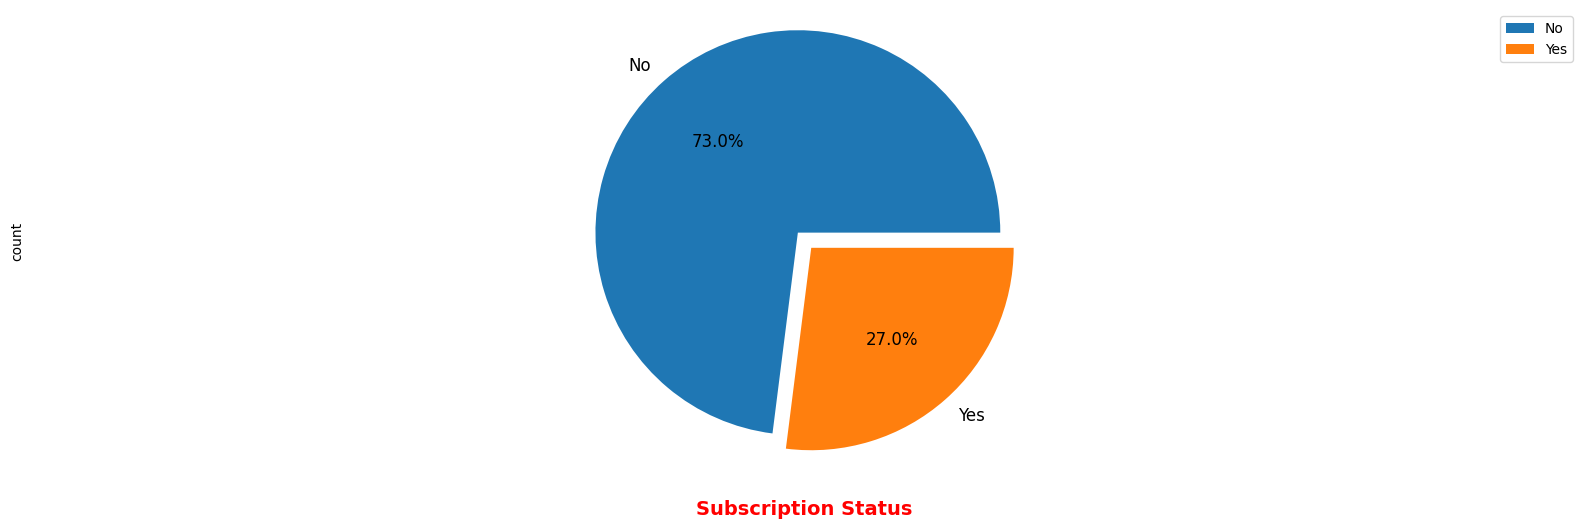

In [ ]:
plt.figure(figsize=(20,6))

counts = sales["Subscription Status"].value_counts()
explode = (0, 0.1)
colors = ["blue","purple"]

counts.plot(kind = 'pie', fontsize = 12,explode = explode, autopct = '%1.1f%%')

plt.xlabel('Subscription Status', weight = "bold", color = "red", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [56]:
sales.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [58]:
# What is the average age of customer in the dataset?

average_age = sales["Age"].mean()
print("Average age : ",average_age)

Average age :  44.06846153846154


In [69]:
# What is the maximum and minimum review rating in the dataset ?
review_max = sales['Review Rating'].max()
review_min = sales['Review Rating'].min()

print( "Maximum review rating : ",review_max, "Minimum review rating : ",review_min)

Maximum review rating :  5.0 Minimum review rating :  2.5


In [70]:
# What is the average review rating of customers in the dataset?
average_rating = sales["Review Rating"].mean()
print("Average review rating : ",average_rating)

Average review rating :  3.7499487179487176


In [66]:
# What is the most common payment method used by customers in the dataset?
payment_method = sales["Payment Method"].mode()[0]
print("Most common payment method : ",payment_method)

Most common payment method :  PayPal


In [67]:
# What is the average age of customers who made purchases in the Summer season ?

average_age_summer = sales[sales["Season"]== 'Summer']['Age'].mean()
print("Number of customers who made purchases in the Summer season : ",average_age_summer)

Number of customers who made purchases in the Summer season :  43.973821989528794
